### Project 2 
## STAT 5474 - Intro to Data Mining
## Daniel Bell
## Wednesday, February 26th, 2020

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import scipy.stats as ss 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import scale 
from sklearn.metrics import euclidean_distances 
from sklearn import manifold

%matplotlib inline 

##### 1. (Data Input)

In [2]:
## Read in data from UCI Machine Learning Repository
train = pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra",
                  sep=",", header=None,names=(["x" + str(i) for i in range(1,65)]+['digit']))
test = pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes",
                  sep=",", header=None,names=(["x" + str(i) for i in range(1,65)]+['digit']))

In [3]:
# Shape of training dataset
train.shape

(3823, 65)

In [4]:
# Shape of testing dataset
test.shape

(1797, 65)

In [5]:
# Combine the two datasets and show its shape
dat = pd.concat([train,test])
dat.shape

(5620, 65)

##### 2. (EDA)

In [6]:
## Create a heatmap of the data
# Sort the data by digit
dat_sorted = dat.rename_axis("index").sort_values(by=["digit","index"])

Text(0.5, 51.0, 'Samples')

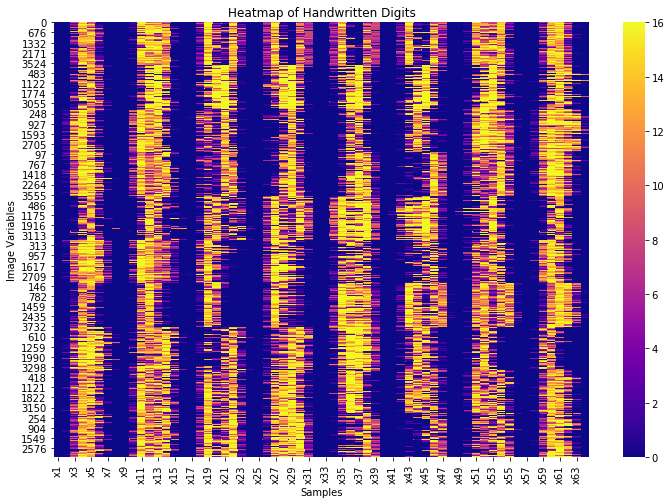

In [7]:
# Plot the heatmap 
plt.figure(figsize=(12,8));
plt.title("Heatmap of Handwritten Digits")
sns.heatmap(dat_sorted.drop(["digit"], axis = 1), cmap="plasma");
plt.ylabel("Image Variables")
plt.xlabel("Samples")

The above plot shows that there tend to be more pixels "on" close together rather than far apart. The sections of darker blue represent the empty space when a digit is written. The areas of color seem to fade gradually moving away from the points where there is a high density of pixels that are "on". Because the data is sorted, we can see that there are similarities in the data as you traverse the heatmap from top to bottom. This indicates that there may exists groups which we should expect as we would expect digits to look similar. This also goes to show that there is still quite a bit of variability within groups of the same digit. From the heatmap, although, it is not clear to see which columns are unary in value, i.e. which columns only have one value. For this we can create a count of unique values and see if any columns only have one unique value. These will be removed as to prevent any data contamination for further evaluation. 

In [8]:
# Look for columns with unary values
dat.nunique()[dat.nunique()==1]

x1     1
x40    1
dtype: int64

In [9]:
# Create new dataframe without the columns with unary values
dat_clean = dat.drop(["x1","x40"], axis=1)

In [10]:
dat_clean.shape

(5620, 63)

For the remainder of the project I will use the dat_clean dataset which excludes two columns ("x1", and "x40") due to the fact that they are both unary. 

##### 3. PCA

To perform PCA in python, I use the sklearn module and import the PCA and scale functions.

In [11]:
# Create PCA object
pca = PCA()
# .values returns an array of only numeric values 
# The scale function standardizes a dataset center to mean 
# and component wise sclae to unit variance
# Then used the scaled dat to fit the PCA
dat_pca = scale(dat_clean.drop(["digit"], axis=1).values)
pca.fit(dat_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Cumulative Percentage of Variance Explained')

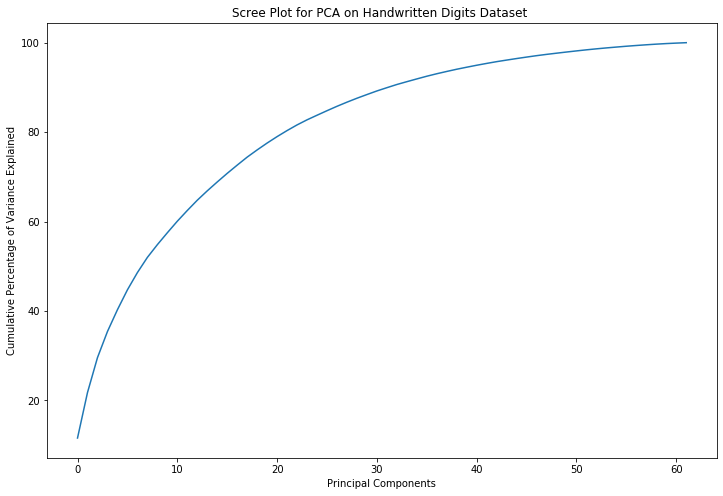

In [12]:
# Plot the cumulative percentages of variation explained by first k components
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.title("Scree Plot for PCA on Handwritten Digits Dataset ")
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Percentage of Variance Explained")

In [13]:
# First principal component
pc1 = pca.components_[0]; pc1

array([-0.176383  , -0.27342451, -0.22094686,  0.07527594,  0.07921543,
        0.09936514,  0.08206715, -0.01661362, -0.23166874, -0.23442579,
        0.04872052, -0.03236963,  0.01060116,  0.13398236,  0.11067677,
       -0.00722615, -0.13070893,  0.01393526,  0.1028141 , -0.13507935,
        0.05133281,  0.1982744 ,  0.11042943,  0.00114227,  0.0935003 ,
        0.15362418, -0.03413705, -0.12052789,  0.15108134,  0.19901062,
        0.0520139 ,  0.0425264 ,  0.20709571,  0.2041037 ,  0.01062907,
        0.01608021,  0.16221487,  0.11649653,  0.07498215,  0.16605707,
        0.09738226,  0.03192454,  0.13930032,  0.0990177 , -0.04986584,
       -0.00706384,  0.04580572, -0.03580021, -0.16002166, -0.05653297,
        0.08564992, -0.09635343, -0.15468039, -0.05125834,  0.00060711,
       -0.15422208, -0.26016184, -0.19522016, -0.05887163, -0.14234605,
       -0.15449291, -0.07791694])

In [14]:
# Second principal component
pc2 = pca.components_[1]; pc2

array([ 0.07285776,  0.11296122,  0.04872792,  0.14943963,  0.25921038,
        0.23412322,  0.13058843,  0.0009637 ,  0.05970103,  0.04761437,
       -0.11075486,  0.044863  ,  0.23395685,  0.25406187,  0.12275645,
        0.00121734, -0.01109763, -0.14989394, -0.13038487,  0.08966197,
        0.17635456,  0.13268153,  0.04778158, -0.00341313, -0.08856205,
       -0.16226759,  0.06264605,  0.20738961,  0.14118902,  0.02868878,
       -0.00029465, -0.00941257, -0.15554471, -0.159489  ,  0.05821463,
        0.11881539,  0.01698357, -0.05161771, -0.03638193, -0.14813376,
       -0.22442681, -0.01819965,  0.07646267, -0.10808103, -0.19912986,
       -0.07222346, -0.02686163, -0.0494187 , -0.14064742, -0.0222884 ,
       -0.00847248, -0.17264622, -0.21045669, -0.10633583, -0.00083315,
        0.06251195,  0.13804985,  0.03547725, -0.24490184, -0.20510897,
       -0.13610406, -0.05429574])

In [15]:
# The transformed data in principal component 1 and 2
dat_pc1 = pca.transform(dat_pca)[:,0]
dat_pc2 = pca.transform(dat_pca)[:,1]

Text(0, 0.5, 'PC2')

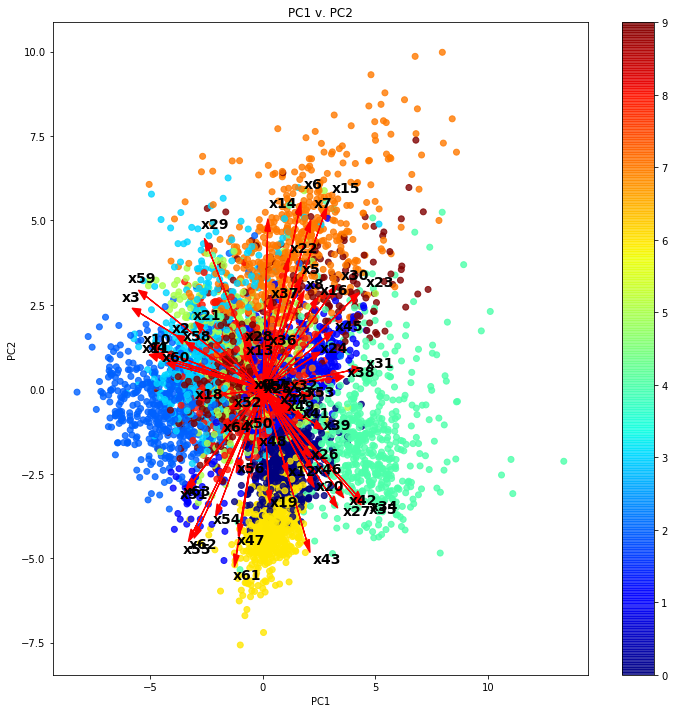

In [16]:
## Plot PC1 v PC2
# Set figure size
plt.figure(figsize=(12,12))
# Plot transformed data
plt.scatter(dat_pc1,dat_pc2, alpha = 0.8, c = dat_clean["digit"], cmap = "jet")
plt.colorbar()
# Get labels for components
labels = list(dat_clean.drop(["digit"], axis=1).columns)
# Plot each component along with its label
for i in range(len(pc1)):
    # Arrows are scaled by a factor to make them visible on the plot
    plt.arrow(0,0,pc1[i]*20,pc2[i]*20, color = "r", head_width=0.25, linewidth = 1.25)
    plt.text(pc1[i]*23,pc2[i]*23, labels[i], fontsize=14, fontweight = "heavy")
# Plotting the number of each observation covered the entire plot 
# I could not find a way to plot the numbers under the arrows
#for i in range(len(dat_pc1)):
#    plt.text(dat_pc1[i],dat_pc2[i],i+1, color = "b")
plt.title("PC1 v. PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")


The above plot is an attempt at R's biplot() function that plots the first two principal components along with the transformed data. While python does not have an equivalent way of producing the same plot, the above is a close approximation to the plot that the biplot() function would produce. There are two important distinctions to make: First, the number of each observation are left out. I attempted to plot them in the same fashion as the labels for the features but the text ended up covering the entire plot and the arrows. Second, the arrows that represent the features and thier weight and direction in PC1 v. PC2 are scaled up by a factor in order to be visible.

From the plot above, there is not a clear pattern regarding which variable selection. You can see that there is a slight possibility that lower variable numbers seem to be located in the first quadrant of the above graph. This would mean that these variables are positively weighted in both PC1 and PC2. From the middle of the plot you can see that there are a few variables that have very small weights meaning that in PC1 and PC2 there are of realatively little importance. This would indicate dimension reduction as these variables are likely to not contribute to the overall variance of the data. This is also to be expected as in the previous scree plot we saw that about 95% of variance can be defined with around 30 variables. 

From the color differentiation, we can see that there are some areas of clear distinction. For example, the digit 4 seems to be clearly clustered and lacks a significant overlap with other digits. This is likewise for the digit 6. It seems however, that 9 and 8 are overlapping with a lot of the other digits meaning that with these two principal components alone we may not be able to distinguish them well from the others.

##### 4. Other MDS Methods

To compute dimension reduction using a different MDS method, I leverage the MDS function from the manifold module within sklearn. It is important to note that for this method I downsampled the data to n=500 for speed and efficacy as the MDS algorithim is O(n^3). After much experimentation, a n=500 sample from the original dataset proved to be the best in speed and output as samples with larger numbers produced unreadable plots. After I sample the data I scale the data to center it and then fit it using a classical MDS on a dissimilarity matrix using the euclidean distance between observations in our dataset. After this I then fit the resulting data using a non-metric MDS with the output of the metric MDS as an initial value. This speeds up the algorithm and produces similar results. Then we perform PCA to rotate the data in the first two principal components.  

In [51]:
# Sample data for speed and efficancy 
dat_mds = dat_clean
dat_mds_sample = dat_mds.sample(n=500)

In [52]:
# Calculate euclidean distances between rows
D = euclidean_distances(scale(dat_mds_sample.drop(["digit"],axis=1)))

In [53]:
# Classical MDS 
model = manifold.MDS(n_components=2, random_state=1, dissimilarity="precomputed")
out = model.fit_transform(D)

Text(0, 0.5, 'Dimension 2')

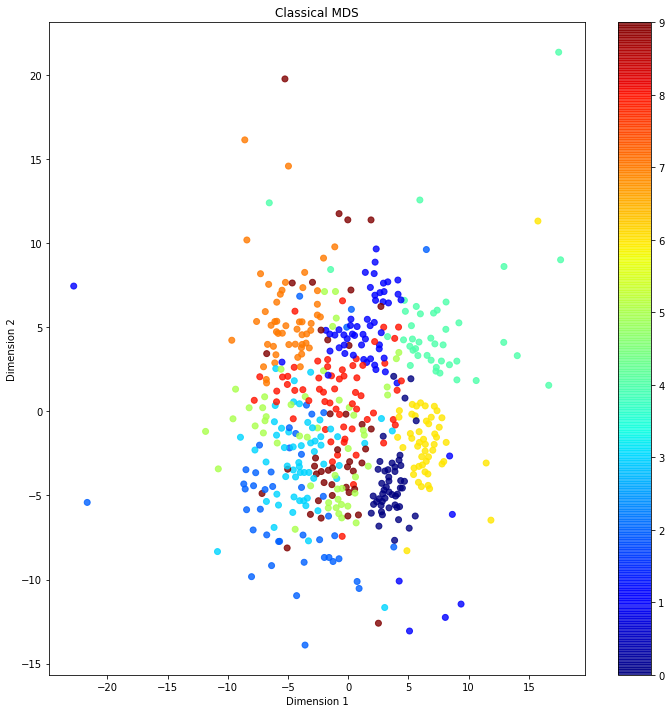

In [55]:
# Plot for classical MDS
plt.figure(figsize=(12,12))
plt.scatter(out[:,0],out[:,1],alpha = 0.8, c = dat_mds_sample["digit"], cmap = "jet")
plt.colorbar()
plt.title("Classical MDS")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

In [56]:
# Initialize MDS for non-metric MDS and fit to dissimilarity data
nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12, dissimilarity="precomputed", random_state=1568, n_jobs=1, n_init=1)
npos = nmds.fit_transform(D, init = out)

Text(0, 0.5, 'Dimension 2')

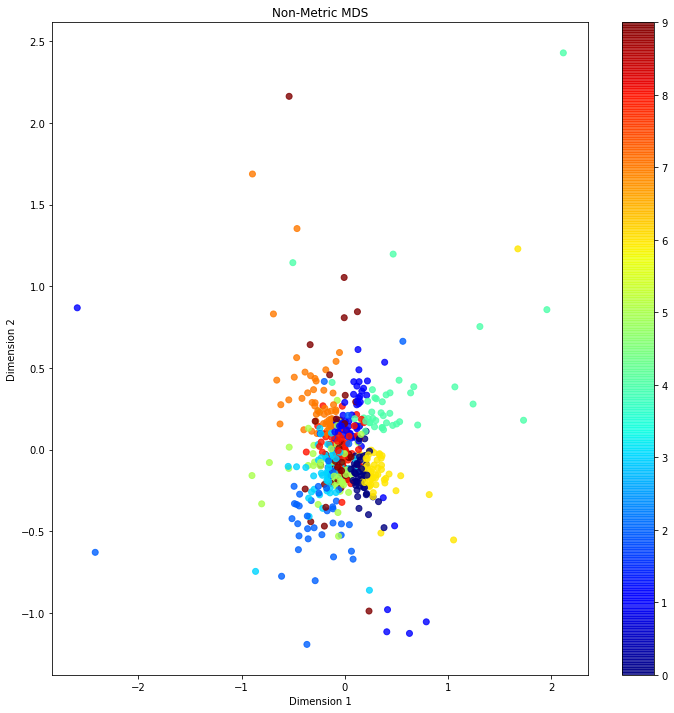

In [57]:
plt.figure(figsize=(12,12))
plt.scatter(npos[:,0],npos[:,1], alpha = 0.8, c = dat_mds_sample["digit"], cmap = "jet")
plt.colorbar()
plt.title("Non-Metric MDS")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

In [58]:
# Rotate data
clf = PCA(n_components=2)
npos = clf.fit_transform(npos)

Text(0, 0.5, 'Dimension 2')

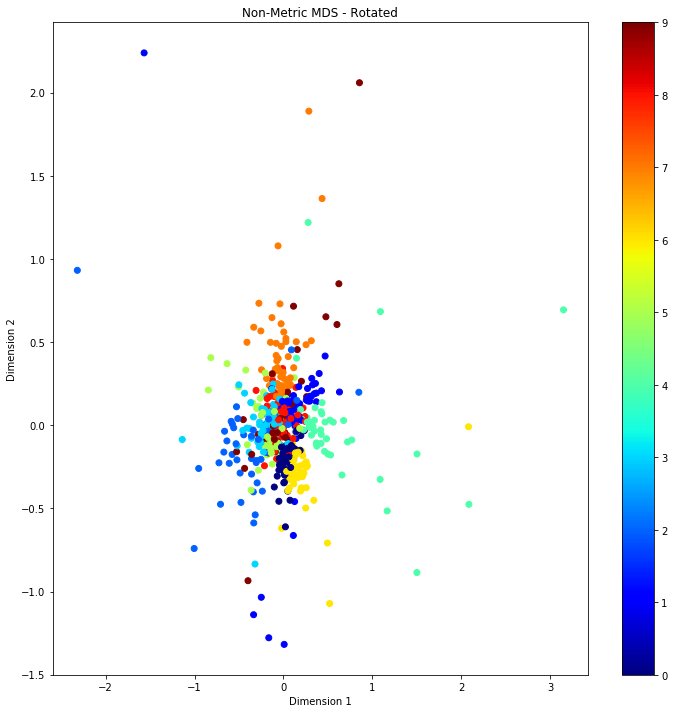

In [60]:
plt.figure(figsize=(12,12))
plt.scatter(npos[:,0],npos[:,1],c = dat_mds_sample["digit"], cmap = "jet")
plt.colorbar()
plt.title("Non-Metric MDS - Rotated")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

##### 5. tSNE

In [80]:
# tSNE dimension reduction using sklearn
tsne = manifold.TSNE(n_components=2, verbose=1, init="pca", random_state=0)
x_tsne = tsne.fit_transform(dat_mds_sample.drop(["digit"],axis=1))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.012s...
[t-SNE] Computed neighbors for 500 samples in 0.072s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 10.484766
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.677174
[t-SNE] KL divergence after 1000 iterations: 0.542975


Text(0, 0.5, 'Dimension 2')

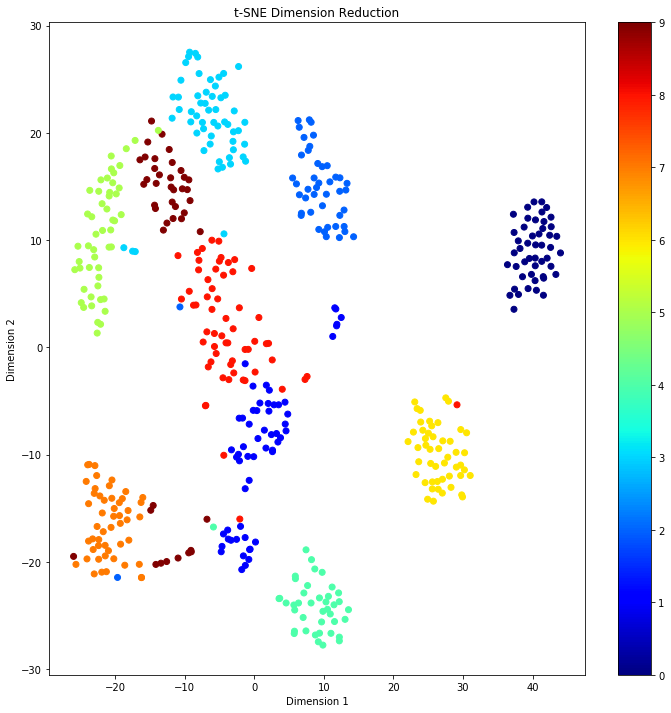

In [81]:
# Plot tSNE 
plt.figure(figsize=(12,12))
plt.scatter(x_tsne[:,0],x_tsne[:,1],c = dat_mds_sample["digit"], cmap = "jet")
plt.colorbar()
plt.title("t-SNE Dimension Reduction")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

Text(0, 0.5, 'Dimension 2')

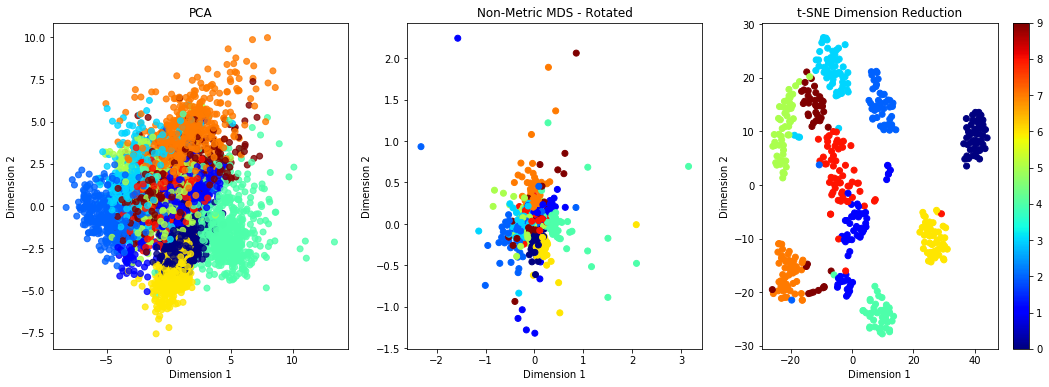

In [82]:
# PCA
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.scatter(dat_pc1,dat_pc2, alpha = 0.8, c = dat_clean["digit"], cmap = "jet")
plt.title("PCA")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
# Non-Metric MDS
plt.subplot(1,3,2)
plt.scatter(npos[:,0],npos[:,1],c = dat_mds_sample["digit"], cmap = "jet")
plt.title("Non-Metric MDS - Rotated")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
# t-SNE
plt.subplot(1,3,3)
plt.scatter(x_tsne[:,0],x_tsne[:,1],c = dat_mds_sample["digit"], cmap = "jet")
plt.colorbar()
plt.title("t-SNE Dimension Reduction")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

From the plots above you can see the differences in the three types of dimension reduction. It is important to note that for non-metric MDS and t-SNE, the sample size was reduced to n=500 for speed and efficency on a personal computer. These methods are computational more intensive and performance decreases significantly with n. 

Comparing the plots above, we can see that even though it is considered the most primative/widely used, principal component analysis efficently reduces the dimensions of a large dataset and is able to group data based on thier variance and covariance relationships. Non-metric Multidimensional Scaling takes it a bit further using a dissimilarity matrix that defines the distances (euclidean in our case) between rows of data and does a good job of dimension reduction as well as clustering the data into like digits. The last method, t-SNE goes the furthest in terms of accurate clusters of data. Without needing to scale the data (in fact I found that the non scaled data performed better than the scaled data), t-SNE is able to reduce dimension and very well group like digits together. The output of t-SNE could be very well suited for a clustering algorithm to further define the boundaries of the clustered data. 

Again, the trade off between these methods could be performance and speed. Also, t-SNE algorithm suggest first dimesionality reduction via some other method before applying t-SNE as very high dimensionally data is not well suited for t-SNE. In any case, the three methods are all very applicable and interesting ways of dimension reduction. 